In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob


from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import itertools

import keras
from keras.utils.np_utils import to_categorical  # use for converting labels to one-hot-encoding
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization  import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [6]:
images_df = pd.read_csv("/Users/AB/Desktop/77k_trial_2.csv")
images_df.head()

,id,image_id,label
0,0,drowsy0,0
1,1,drowsy1,0
2,2,drowsy2,0
3,3,drowsy3,0
4,4,drowsy4,0


In [8]:
path  = []
count=0

for i in images_df['id']:
    if i < 40309:
        path.append("/Users/AB/Desktop/data/drowsy"+str(i)+".jpg")
    else:
        path.append("/Users/AB/Desktop/data/vigilant"+str(i)+".jpg")
    while i > 77218:
        break
        
print(len(path))
images_df['path'] = path
images_df = shuffle(images_df)

77219


In [9]:
images_dict = {
    '0': 'Drowsy',
    '1': 'Vigilant'}

In [10]:
import cv2
from tqdm import tqdm
def Dataset_loader():
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in images_df['path']:
        img = read(IMAGE_NAME)
        img = cv2.resize(img, (100,75))
        IMG.append(img)
    return IMG
images_df['image'] = Dataset_loader()

In [9]:
print(images_df['image'])

8613     [[[172, 183, 187], [174, 185, 189], [176, 187,...
49300    [[[189, 179, 188], [192, 184, 182], [192, 183,...
76966    [[[198, 179, 191], [201, 198, 215], [202, 199,...
36528    [[[149, 132, 125], [166, 151, 144], [188, 180,...
51870    [[[190, 180, 178], [194, 179, 182], [194, 182,...
                               ...                        
63206    [[[191, 189, 195], [194, 192, 206], [195, 196,...
61404    [[[190, 181, 182], [190, 180, 188], [190, 181,...
17730    [[[191, 201, 210], [193, 204, 210], [195, 205,...
28030    [[[189, 179, 177], [193, 183, 182], [195, 186,...
15725    [[[190, 199, 206], [193, 202, 209], [193, 204,...
Name: image, Length: 77219, dtype: object


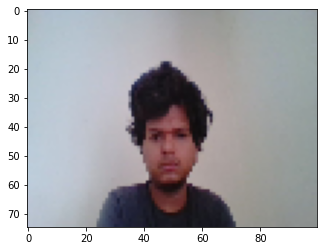

In [10]:
plt.figure()
plt.imshow(images_df['image'][0])
plt.grid(False)
plt.show()

In [16]:
cropped_images = []

for i in images_df['image']: 
    imgCropped = i[50:250, 50:200]
    cropped_images.append(imgCropped)
cropped_images = np.array(cropped_images)
cropped_images.shape

(77219, 200, 150, 3)

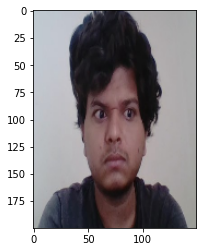

In [17]:
plt.figure()
plt.imshow(cropped_images[0], cmap = 'gray')
plt.grid(False)
plt.show()

In [11]:
x = images_df['image']
y = images_df['label']

In [12]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(x, y, test_size=0.10,random_state=1234)

In [13]:
x_train = np.asarray(x_train_o.tolist())
x_test = np.asarray(x_test_o.tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [14]:
y_train = to_categorical(y_train_o, num_classes = 2)
y_test = to_categorical(y_test_o, num_classes = 2)

In [15]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
input_shape = (75,100,3)
num_classes = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
#model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 100, 32)       896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)            

In [17]:
opt = Adam(lr=0.001)

#, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False

In [18]:
model.compile(optimizer = opt , loss = "binary_crossentropy", metrics=["accuracy"])

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [20]:
epoch = 1
batch_size = 2000

history = model.fit(x_train,y_train, batch_size=batch_size,
                              epochs = epoch, validation_data = [x_validate,y_validate],
                              verbose = 1,
                              )

#callbacks=[learning_rate_reduction]

Train on 62547 samples, validate on 6950 samples
Epoch 1/1
62547/62547 [==============================] - 1154s 18ms/step - loss: 0.3269 - accuracy: 0.8916 - val_loss: 0.0040 - val_accuracy: 0.9984


In [21]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("detection_model.h5")

6950/6950 [==============================] - 40s 6ms/step
Validation: accuracy = 0.998417  ;  loss_v = 0.003967
Test: accuracy = 0.998057  ;  loss = 0.004127


In [34]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

In [35]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

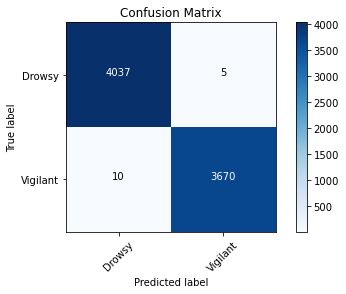

In [36]:
# plot the confusion matrix
cm_plot_labels = ['Drowsy', 'Vigilant']

plot_confusion_matrix(confusion_mtx, cm_plot_labels, title='Confusion Matrix')
#plot_confusion_matrix(confusion_mtx, classes = range(7))

In [37]:
from keras.preprocessing import image
img_pred = image.load_img("/Users/AB/Desktop/data/vigilant48412.jpg", target_size = (75, 100))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)

In [39]:
result = model.predict(img_pred)
print(result)

if result[0][0] == 0:
    prediction = 'drowsy'
else:
    prediction = 'vigilant'
    
print(prediction)

[[1. 0.]]
vigilant
